<a href="https://colab.research.google.com/github/Sreeshbk/computer_vision/blob/main/ipynbnotebook/introduction_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Utility Function
import os
import urllib.request
from os import path

DOWNLOAD_IMG_WEB = True
RELATIVE_PATH = "./images"
from collections import defaultdict

def downloadImage(rel_path=RELATIVE_PATH):
  '''Download image if the files are not available in local. Add the path of web url if needed to download or else place all the images in the relative path  Modify the code to add your own images and Image Map
  Parameter: rel_path = path where the images are final saved or already placed
  Processing: IMG_MAP - Key and mapping file name. Images are referenced by name in below code, incase program needs to be test for different image modify or add the new entry
  Output: A Map with key and file path as value  '''
  IMG_MAP={ "mandrill": "https://upload.wikimedia.org/wikipedia/commons/c/c0/Wikipedia-sipi-image-db-mandrill-4.2.03-quantize-only-CCC.png",
            "bookpage":"https://pythonprogramming.net/static/images/opencv/bookpage.jpg",
            "spoon" :"https://upload.wikimedia.org/wikipedia/commons/a/a0/Loeffel_03.JPG",
            "houses" : "https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Houses_in_Malacca.jpg/640px-Houses_in_Malacca.jpg"}  
  if not os.path.exists(rel_path) and rel_path != ".": 
    os.makedirs(rel_path)  
  for key, image_url in IMG_MAP.items():
    urllib.request.urlretrieve(image_url, rel_path+"/"+key+path.splitext(image_url)[1])

# to download images
if DOWNLOAD_IMG_WEB or not os.path.exists(rel_path):
  downloadImage() 
image_map ={}
for root, _, files in os.walk(RELATIVE_PATH, topdown=False): 
  for file in files:  
    image_map[file.split(".")[0]] = str(root)+"/"+file


# Image processing using OpenCV

Image processing loads the image into Numpy arrays. The imread function from cv2 library has to be used. 

Note: cv2 handles images in BGR (Blue, Green, Red) format by default, unlike the usual RGB format. 

In [2]:
import cv2 as cv
import numpy as np
image_name=image_map["mandrill"]
image_name

'./images/mandrill.png'

### Read Image

` image_ref= cv2.imread(abs_path_to_ip_file_as_string, ImreadModes) `

In [3]:
img_color = cv.imread(image_name,cv.IMREAD_COLOR) #default - IMREAD_COLOR or 1
img_color = cv.resize(img_color,(400,400))
img_unchanged = cv.imread(image_name,cv.IMREAD_UNCHANGED) # IMREAD_UNCHANGED or -1
img_unchanged = cv.resize(img_unchanged,(400,400))
img_grayscale = cv.imread(image_name,cv.IMREAD_GRAYSCALE) #IMREAD_COLOR or 0
img_grayscale = cv.resize(img_grayscale,(400,400))


### Display Image

Syntax:
OpenCV:
> cv2.imshow(window_name_as_string,image_ref) <br>
> cv2.waitKey(time_to_wait_in_milliseconds) <br>
> cv2.destroyAllWindows() <br>

Note: imshow is disabled in collab. For Collab env use

> from google.colab.patches import cv2_imshow<br>
> cv2_imshow(cv2_imshow)<br>

Matplotlib:
OpenCV generated images as BGR array so to display the image as using Matplotlib(plt.imshow()) image needed to be converted for BGR to RGB




In [4]:
def show_image(image,named_window="Image"):
  def display_image(f,parameter):
    f(*parameter)

  if 'google.colab'  in str(get_ipython()):
    from google.colab.patches import cv2_imshow
    if type(image) is tuple:
      image =image[1]
    display_image(cv2_imshow,(image,))
  else:
    display_image(cv.imshow,(named_window,image))
    cv.waitKey(500) #when no arg, waits till any key press 
    cv.destroyAllWindows() #closes all managed windows 

<class 'numpy.ndarray'>


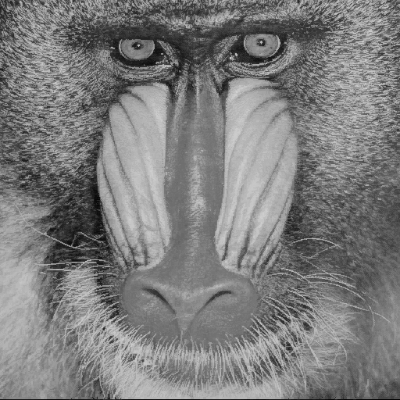

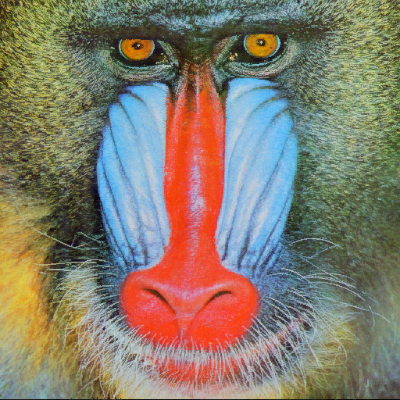

In [5]:
import matplotlib.pyplot as plt
print(type(img_color))
show_image(img_grayscale)
show_image(img_color)


### Resize Image File

 ` new_ref=cv2.resize(org_img_ref,(new_width,new_height)) `

(400, 400, 3)
(150, 150, 3)


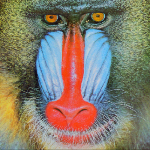

In [6]:
print(img_color.shape)

resized_img = cv.resize(img_color,(150,150))
print(resized_img.shape)
show_image(resized_img)

Write Image file

> cv2.imwrite(filename_as_string, image_ref)

In [7]:
cv.imwrite('img_resized.png',resized_img) 

True

### Color Space
`Color Space` refers to a specific way to organize colors. A color space helps in representing pixel values as tuples. The pixel value 0 is taken as black and 255 is taken as white.  

There are many other color spaces that are useful for different purposes. Few color spaces like RGB, HSV, Gray, GRB, YUV, CMYK etc. are more popular. By default, OpenCV reads images in RGB color space but it stores the colors of images in BGR format not in RGB format

In [8]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )


['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

### Change Color

> gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
> plt.imshow(gray_img)

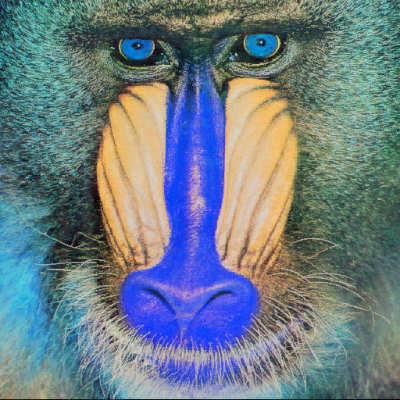

In [9]:
img_color = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

# Converting BGR to RGB for matplotlib 
show_image(img_color)

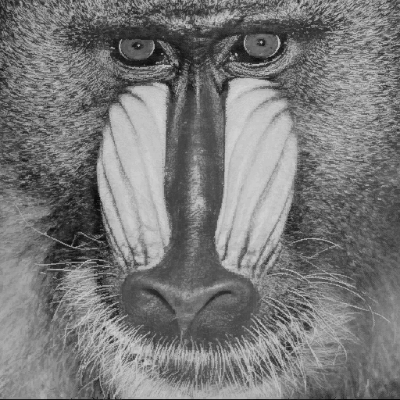

In [10]:
gray_img = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
show_image(gray_img)

### Transformation

`Transformation` is a function. A function that maps one set to another set after performing some operations. 

Common image transformation techniques using OpenCV package.  

* Geometrical Transformations 
* Scaling 
* Translation 
* Rotation 
* Affine Transformation 
* Perspective Transformation
* Morphological Transformations 
  * Erosion 
  * Dilation 
  * Opening 
  * Closing 
  * Morphological Gradient 
  * Top Hat 
  * Black Hat 

#### Scaling

Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. 

Syntax: 

> cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
where
* src	-  source/input image
* dsize - desired size for the output image
* fx - scale factor along the horizontal axis
* fy - scale factor along the vertical axis
* interpolation	- flag that takes one of the following methods. 
  * INTER_NEAREST – a nearest-neighbor interpolation
  * INTER_LINEAR – a bilinear interpolation (used by default) This is primarily used when zooming is required
  * INTER_AREA – resampling using pixel area relation. This is used when we need to shrink an image.
  * INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood This is slow but more efficient.
  * INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood

By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes.  

In [11]:
import matplotlib.pyplot as plt


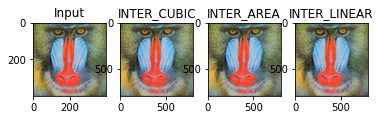

In [12]:

res = cv.resize(img_color,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
res1 = cv.resize(img_color,None,fx=2, fy=2, interpolation = cv.INTER_AREA)
res2 = cv.resize(img_color,None,fx=2, fy=2, interpolation = cv.INTER_LINEAR)
plt.subplot(241),plt.imshow(img_color),plt.title('Input')
plt.subplot(242),plt.imshow(res),plt.title('INTER_CUBIC')
plt.subplot(243),plt.imshow(res1),plt.title('INTER_AREA')
plt.subplot(244),plt.imshow(res2),plt.title('INTER_LINEAR')
plt.show()


#### Translation
Translation is the shifting of object’s location

A Affine transformation that can be expressed in the form of a matrix multiplication (linear transformation) followed by a vector addition (translation).

Y = A  [*X]  + B = [A B].[*X 1]T
          

(400, 400, 3)


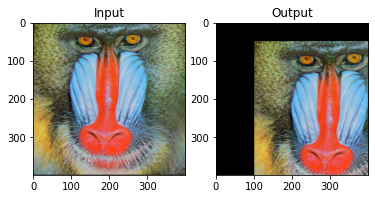

In [13]:
print(img_color.shape)
rows,cols,_ = img_color.shape
M = np.float32([[1,0,100],[0,1,50]])#
dst = cv.warpAffine(img_color,M,(cols,rows))
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Rotation
Rotation of an image for an angle Θ is achieved by the transformation matrix of the form  

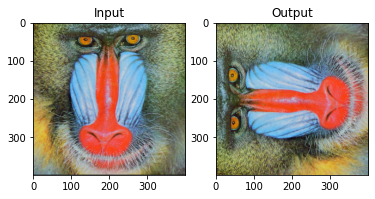

In [14]:
rows,cols,_ = img_color.shape
M = cv.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv.warpAffine(img_color,M,(cols,rows))
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Affine Transformation 

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine

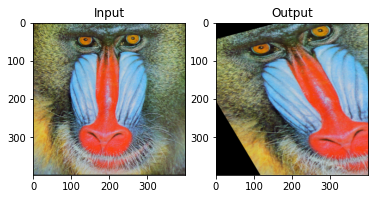

In [15]:
rows,cols,ch = img_color.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img_color,M,(cols,rows))
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix. 

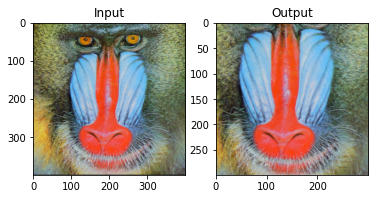

In [16]:

rows,cols,ch = img_color.shape
pts1 = np.float32([[56,65],[368,65],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img_color,M,(300,300))
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


#### Morphological transformations 
Morphological transformations are simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. 

Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play.



##### Erosion 

A kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero). 

 
All the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc. 

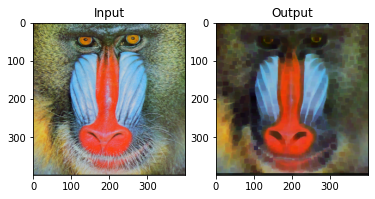

In [17]:
kernel = np.ones((10,10),np.uint8)
erosion = cv.erode(img_color,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(erosion),plt.title('Output')
plt.show()

##### Dilation 

Opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object. 

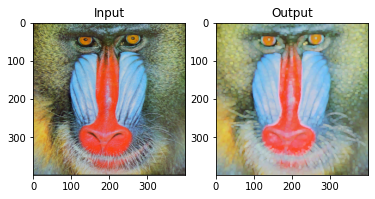

In [18]:
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img_color,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(dilation),plt.title('Output')
plt.show()

##### Opening 

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

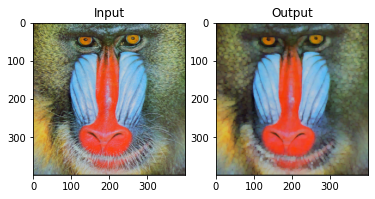

In [19]:

kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img_color, cv.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(opening),plt.title('Output')
plt.show()


##### Closing 

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object. 


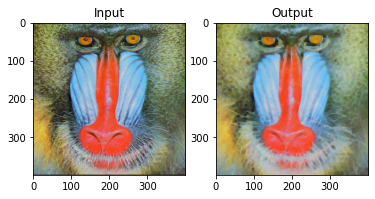

In [20]:
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img_color, cv.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(closing),plt.title('Output')
plt.show()

##### Morphological Gradient 
It is the difference between dilation and erosion of an image. 

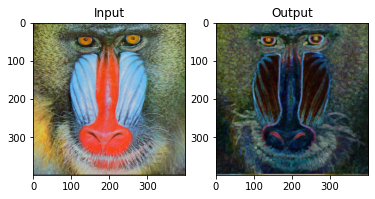

In [21]:

kernel = np.ones((5,5),np.uint8)
gradient = cv.morphologyEx(img_color, cv.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(gradient),plt.title('Output')
plt.show()


##### Top Hat 

It is the difference between input image and Opening of the image.

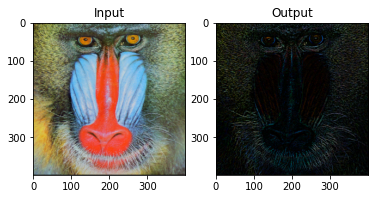

In [22]:
kernel = np.ones((5,5),np.uint8)
tophat = cv.morphologyEx(img_color, cv.MORPH_TOPHAT, kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(tophat),plt.title('Output')
plt.show()

##### Black Hat 

It is the difference between the closing of the input image and input image. 

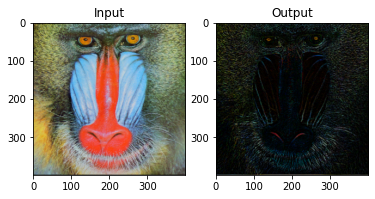

In [23]:

kernel = np.ones((5,5),np.uint8)
blackhat = cv.morphologyEx(img_color, cv.MORPH_BLACKHAT, kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(blackhat),plt.title('Output')
plt.show()


## Image processing

 

#### Blending and Pasting

$blended$ = $\alpha$ * $src1$ + $\beta$ * $src2$ + $\gamma$



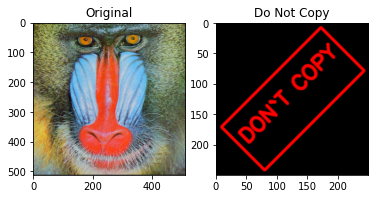

In [24]:
def create_docopy_image():
  white_bg = np.zeros((250,250,3),dtype=np.uint8 ) 
  cv.putText(white_bg,'DON`T COPY',(20,125), cv.FONT_HERSHEY_SIMPLEX, 1.1,(255,0,0),3,cv.LINE_AA)
  cv.rectangle(white_bg,(10,75),(240,175),(255,0,0),3)
  return rotate_image(white_bg,45)
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
  return result

img1 = cv.imread(image_map["mandrill"],1)
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)

donotcopy = create_docopy_image()
plt.subplot(121)
plt.imshow(img1)
plt.title('Original')
plt.subplot(122)
plt.imshow(donotcopy)
plt.title('Do Not Copy')
plt.show()

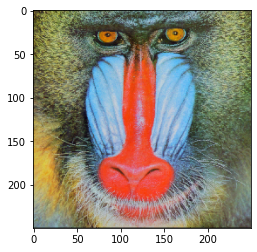

In [25]:
img1_r =cv.resize(img1,(250,250))
plt.imshow(img1_r)

Bend across the original image, resize both the image to same size

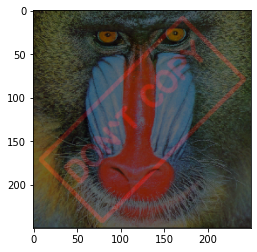

In [26]:
blended = cv.addWeighted(src1=img1_r,alpha=0.5,src2=donotcopy,beta=0.2,gamma=0)
plt.imshow(blended)

Bend to a portion of original

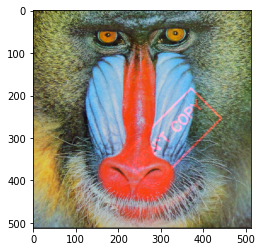

In [27]:
img1_sliced= img1[175:425,200:450]
blended = cv.addWeighted(src1=img1_sliced,alpha=1,src2=donotcopy,beta=0.5,gamma=0)
img1_c =img1.copy()
img1_c[175:425,200:450]=blended
plt.imshow(img1_c)

### Image Thresholding

Thresholding is one of the preprocessing methods. In thresholding, a threshold value is defined. We compare this threshold value with each pixel value of the image and update it accordingly. For example, in simple thresholding, if a pixel value is less than the threshold value, it is made 0 (that is black) and if it is greater than the threshold, it is made 1 (that is white).

Image thresholding helps in creating binary image from a color or gray scale image. Noise reduction is an important task in image processing. Thresholding helps in noise reduction. It also helps in separating light and dark regions of an image.

Many times in image processing tasks, we need to recognize objects. In these cases, the background has not much significance and hence there is a need to subtract background. In some other applications the foreground plays an important role and needs to be extracted from the image. Image thresholding techniques helps in separating the background pixels from foreground pixels in images.  

OpenCV supports multiple thresholding techniques. Some of them are:

1.       Simple

2.       Inverted

3.       Truncated

4.       Adaptive

These techniques work well on greyscale image. So, we need to convert an image to grayscale image before applying these techniques. Let us look at few important thresholding techniques:

#### Simple Thresholding

If pixel value in an image is greater than a threshold value, it is assigned one value (may be white) else it is assigned another value (may be black). Thresholding happens on a gray scale image.

cv2.threshold(). 
* First argument is the source image, which should be a grayscale image. 
* Second argument is the threshold value which is used to classify the pixel values. 
* Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 
* The fourth argument is the type of thresholding we want to do. For simple or binary thresholding, the 4th argument is cv2.THRESH_BINARY. 

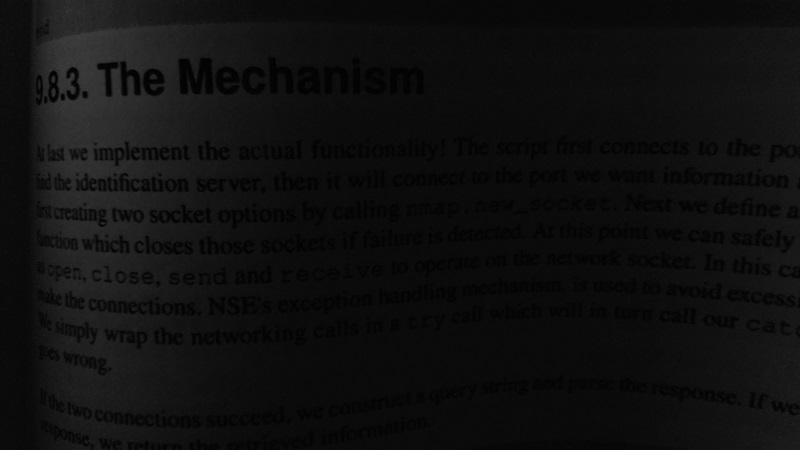

In [28]:
t_image = cv.imread(image_map["bookpage"])
t_image_greyscale = cv.cvtColor(t_image,cv.COLOR_BGR2GRAY)
show_image(t_image_greyscale)

#### Inverted Thresholding

This technique is the inverse of the simple thresholding technique. Here if the pixel value is less than the threshold value, the pixel value will be updated to 255, else it will be updated to 0. 

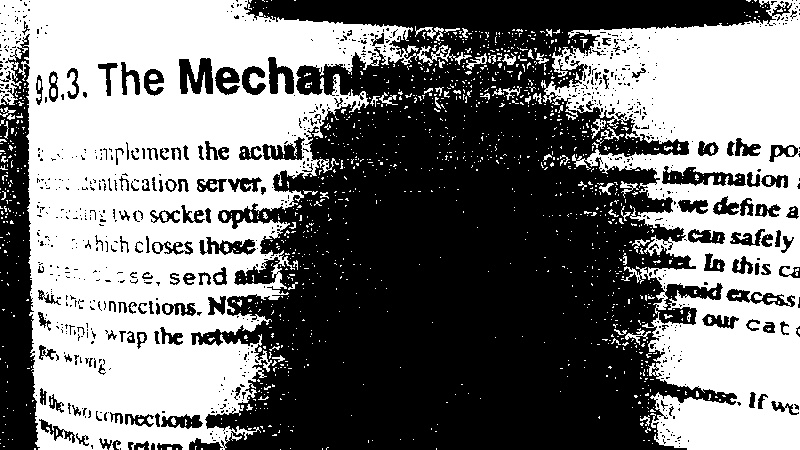

In [29]:
thimage = cv.threshold(t_image_greyscale, 12, 255, cv.THRESH_BINARY)
show_image(thimage)     

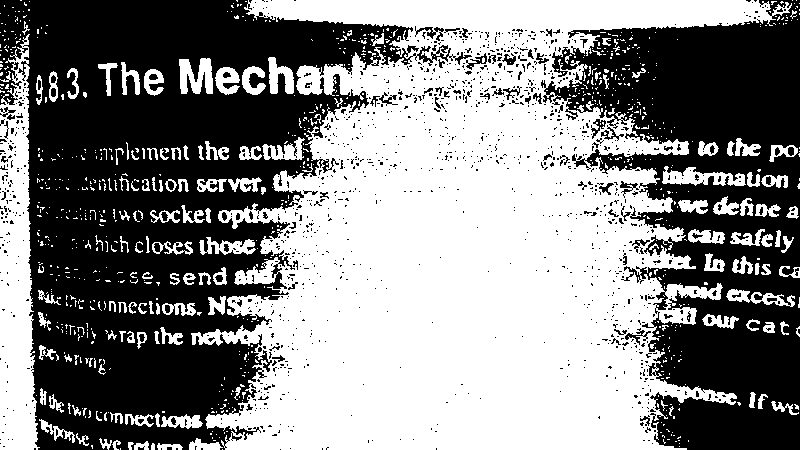

In [30]:
thval, invthimage = cv.threshold(t_image_greyscale, 12, 255, cv.THRESH_BINARY_INV)
show_image(invthimage)

#### Adaptive Thresholding

The image is converted to many regions. For each region, the threshold value is calculated, unlike simple thresholding where the threshold value is global.

In OpenCV, the method `cv2.adaptiveThreshold()` is used to do the adaptive thresholding of an image. 

The syntax is:


> cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)

where, 
* source is the input image, 
* maxVal is the value that is assigned to a pixel, 
* adaptiveMethod shows how to calculate the threshold value, 
* blocksize is the pixel neighborhood size, 
* constant is the value that is to be subtracted from the mean.

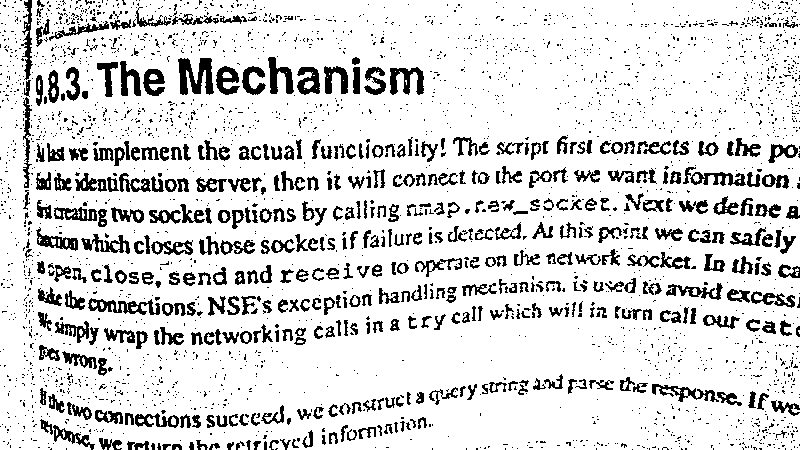

In [31]:
adaptiv_image = cv.adaptiveThreshold(t_image_greyscale, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 25, 1.5)
show_image(adaptiv_image)

### Image domain

An image domain is the domain in which the arrangement and relationship among different pixel intensities are expressed. There are different domains in which an image can be represented. Few important image domains are,

* Spatial domain : Commonly used one is Spatial domain. Mostly digital images are represented in this domain. Here, images are seen as a collection of pixels and the pixel value change with respect to the scene
* Frequency domain : Image is analyzed with respect to the frequency at which the pixel values occurs or changes
* Time-Frequency domain

#### Smoothing techniques (Spacial Domain)
Smoothing techniques are used to reduce the noise present in an image. Note that, noise in image refers to variation of brightness or color information in images. This is usually an aspect of electronic noise. It can also be produced by the sensor and circuitry of a scanner or digital camera. 

In smoothing, the image is blurred with various low pass filters. A low pass filter averages out rapid changes in intensity in an image. The simplest low-pass filter just calculates the average of a pixel in all of its eight immediate neighbors. The result replaces the original value of the pixel. This process is repeated for every pixel in the image. A smoothing filter helps in removing sharp transitions of pixels.  

In a similar manner, many different low pass filters are defined. In this section, Two types of smoothing or low pass filtering techniques:

1. Spatial Filtering
2. Averaging

###### Spatial Filtering

A filter with some height and width which is much less than the size of the image, is called a spatial filter. Commonly used size of spatial filter is 3 by 3, 5 by 5, or 7 by 7. A filter is also called as a kernel, mask, window or a template. 

The following is an example of a 3 by 3 spatial filter.Filtering is performed in the following way:
* For each pixel, a 3 by 3 window is centered on this pixel, all pixels falling in this window are summed. 
* This value is replaced by the pixel value.
* Similar process is done for each pixel in the image. 
* Finally, we get an image which is not very different from the original image but yes, with smooth pixel values.

We can use the cv2.blur() method of OpenCV to implement this. 

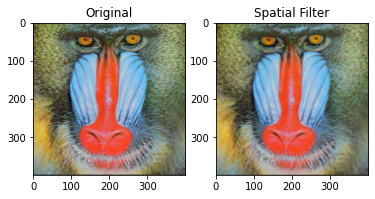

In [32]:
spa_fil = cv.blur(img_color,(3,3))
plt.subplot(121)
plt.imshow(img_color)
plt.title('Original')
plt.subplot(122)
plt.imshow(spa_fil)
plt.title('Spatial Filter')
plt.show()

###### Average Filtering

The blurring is done by convolving the image with a suitable kernel. It simply takes the average of all the pixels under kernel area and replace it with the central element. This is done by the function cv2.blur() or cv2.boxFilter(). We should specify the width and height of kernel.

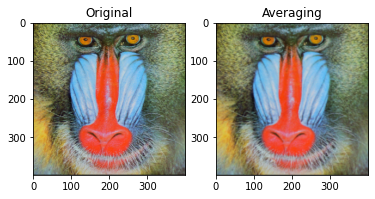

In [33]:
kernel = np.ones((3,3),np.float32)/9
dst = cv.filter2D(img_color,-1,kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Original')
#plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
#plt.xticks([]), plt.yticks([])
plt.show()

### Contours 
Contours are bounding lines, that enclose pixels of similar intensity concentrated in a region. Contours help in shape analysis, object detection and recognition.

Before finding the contours, it is recommended to convert an image to binary format, for better & accurate results. Thresholding techniques can be applied to achieve the same, or it can be achieved by canny edge detection

In [34]:
contour_impath = image_map["spoon"]
contour_img = cv.imread(contour_impath)
contour_img_resize = cv.resize(contour_img,(400,400))
contour_img_grayscale = cv.cvtColor(contour_img_resize, cv.COLOR_BGR2GRAY)
thresh_val,img_simple_thresh=cv.threshold(contour_img_grayscale,127,255,cv.THRESH_BINARY)

###### findContours
On the binary image, findContours function of cv2 library is used to detect all contours in the image.

> contours_ref, cont_hierarchy_ref = cv2.findContours(ip_binary_img_ref, RetrievalModes, contourApproximationModes)

where

* result_img_ref will be copy of ip_binary_img_ref
* contours_ref => collection of contours detected
* cont_hierarchy_ref => based on the RetrievalMode, how detected contours are related<br>
RetrievalModes => https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

* contourApproximationModes => cv2.CHAIN_APPROX_NONE or cv2.CHAIN_APPROX_SIMPLE
 * cv2.CHAIN_APPROX_NONE – identifies continuous bounding line as contours
 * cv2.CHAIN_APPROX_SIMPLE – identifies prominent points that marks the edges of the contours


In [35]:
img_contours, cont_hierarchy = cv.findContours(img_simple_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cont_hierarchy.shape

(1, 183, 4)

##### DrawContours

To draw the detected contours, drawContours function of cv2 library is used. This method, modifies the image, on which it works.

Syntax:

> cv2.drawContours(img_ref,contours_collection_ref,contour_index,color,thickness,lineTypes)
where

* color => (blue_component, green_component, red_component)
* line_type => cv2.FILLED, cv2.LINE_4, cv2.LINE_8 or cv2.LINE_AA (equivalent to -1, 4, 8 or 16)

Note: if contour_index given as -1, draws all contours.

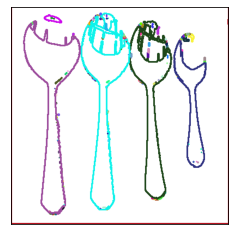

In [36]:
canvas = 255*np.ones((contour_img_grayscale.shape[0], contour_img_grayscale.shape[1], 3), dtype=np.uint8)
for i in range(len(img_contours)):
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    cv.drawContours(canvas, img_contours, i, color, 2, cv.LINE_8) #specific contour
plt.xticks([]), plt.yticks([])
plt.imshow(canvas)

##### convexHull
In certain cases, instead of a rugged contour, there might be need for smooth bounding line. That is where convex hull fits in. To generate a convex hull, for a contour, the convexHull function of cv2 library is used

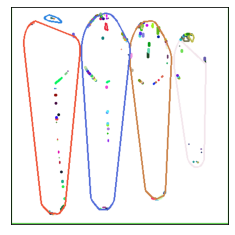

In [37]:
canvas = 255*np.ones((contour_img_grayscale.shape[0], contour_img_grayscale.shape[1], 3), dtype=np.uint8)
for i in range(len(img_contours)):
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    spoons_hull = [cv.convexHull(img_contours[i])]
    cv.drawContours(canvas, spoons_hull, 0, color,2)
plt.xticks([]), plt.yticks([])
spoons = cv.cvtColor(canvas, cv.COLOR_BGR2RGB)
plt.imshow(spoons)

##### Bounding Rectangles

Draw a rectangle that bounds the contour.

1. Finding the bounding rectangle –

> x,y,wd,ht=cv2.boundingRect(contour_ref)<br>
> where (x,y) will be the left bottom co-ordinates of the bounding rectangle with width wd, and height ht.

2. Drawing the rectangle –

> cv2.rectangle(img_ref,(x,y),(x+wd,y+ht),color)

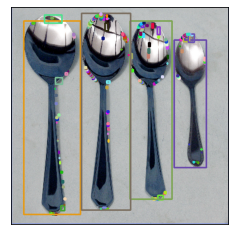

In [38]:
img_contours_rect = cv.resize(contour_img, (400,400))
for i in range(len(img_contours)):
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    x,y,w,h = cv.boundingRect(img_contours[i])
    cv.rectangle(img_contours_rect,(x,y),(x+w,y+h),color,2)
plt.xticks([]), plt.yticks([])
plt.imshow(img_contours_rect)

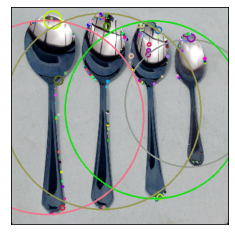

In [39]:
img_cir = cv.resize(contour_img, (400,400))
for i in range(len(img_contours)):
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    (x,y),radius = cv.minEnclosingCircle(img_contours[i])
    center = (int(x),int(y))
    radius = int(radius)
    cv.circle(img_cir,center,radius,color,2)
plt.xticks([]), plt.yticks([])
plt.imshow(img_cir)

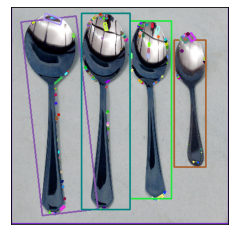

In [40]:
img_rota_rect = cv.resize(contour_img, (400,400))
for i in range(len(img_contours)):
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    rota_rect = cv.minAreaRect(img_contours[i])
    box = cv.boxPoints(rota_rect)
    box = np.intp(box)
    cv.drawContours(img_rota_rect,[box],0,color,2)
plt.xticks([]), plt.yticks([])
plt.imshow(img_rota_rect)

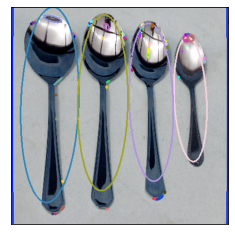

In [41]:
img_ellipse = cv.resize(contour_img, (400,400))
for i in range(len(img_contours)):
    if(img_contours[i].shape[0]>=5):
        color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
        ellipse = cv.fitEllipse(img_contours[i])
        cv.ellipse(img_ellipse,ellipse,color,2)
plt.xticks([]), plt.yticks([])
plt.imshow(img_ellipse)

### Image Gradients

OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian. 

1. Sobel and Scharr Derivatives

Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively).

Sobel edge detector is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes.

The operator uses two 3X3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical. The picture below shows Sobel Kernels in x-dir and y-dir

$$\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$$

$$\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$$


2. Laplacian

Unlike the Sobel edge detector, the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass.

A kernel used in this Laplacian detection looks like this:

$$\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$$

If we want to consider the diagonals, we can use the kernel below:


$$\begin{bmatrix} 1 & 1 & 1 \\ 1 & 8 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


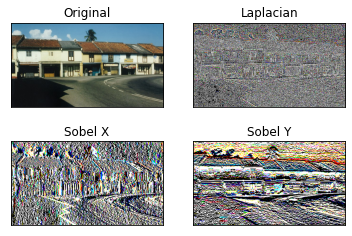

In [53]:
img = cv.imread(image_map["houses"],1)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

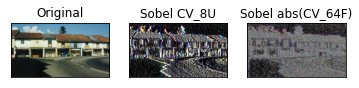

In [54]:
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

## Feature extraction

Feature extraction is an important technique to carry out machine vision related tasks. It refers to the process of extracting relevant and meaningful features from an image. One of the important image processing task is to recognize objects present in an image. So, given an image there is a need to identify the unique pixel values, unique properties which defines the image. These unique properties or the unique signatures are called features of the image. This technique helps to figure out the distinctive parts of an image, like lines, special patches, corners, edges etc.

An image may contain redundant pixel values which may not help in further analysis. By feature extraction, we can get rid of the redundant pixels and come up with a comparatively smaller representation of set of features, called feature vector. In other words, transformation of the input image into a set of features is called `Feature Extraction`.
 

#### Edge Detection

An edge in an image is the area where the brightness changes sharply, or we can say, these are the areas in which there are discontinuities in pixel values. In image processing, edge detection is a fundamental operation. These edges are extracted as features of images and use as input for model building purpose. In literature, there are several edge detection algorithms/techniques.

edge detection algorithms:

1. Sobel filters for edge detection
2. Canny edge detection algorithm

##### Sobel filters for edge detection

The Sobel operator calculates the change of image intensity at each pixel in the image. It finds the direction of largest increase from lower to higher pixel value and the rate of change in that direction. The output shows how smoothly or abruptly the image undergoes a change and how likely is that the pixel represents an edge. For an image of constant intensity, this filter outputs a zero vector. 

The Sobel operator uses two 3 X 3 masks, one in X-direction and the other in Y-direction of the image. These two masks are convolved with the image to calculate the derivatives. Here, the derivative is found on the image which is discrete function.


$$\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$$

$$\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$$


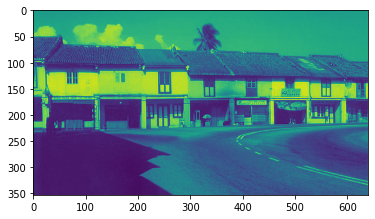

In [56]:
gray_house= cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
plt.imshow(gray_house)


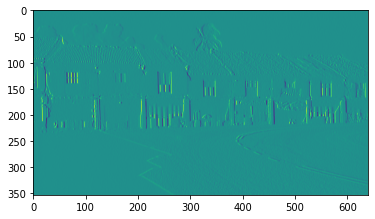

In [58]:
#Horizontal
sobelx_house = cv.Sobel(gray_house,cv.CV_64F,1,0,ksize=3) 
plt.imshow(sobelx_house)

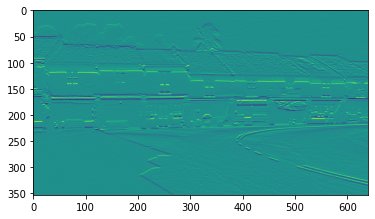

In [60]:
#vertical
sobely_house = cv.Sobel(gray_house,cv.CV_64F,0,1,ksize=3)
plt.imshow(sobely_house)

##### Canny Edge Detector
The Canny Edge Detector is an edge detection algorithm. It has the capability to detect wide range of edges present in an image in real time.
The Canny edge detection algorithm works on a greyscale image. It consists of the following 5 stages:

  1. Noise Reduction : The edges in an image are highly influenced by the noise present in it. If the noise is not removed from an image properly, then there may be a chance that it may create false edges.<br>
So, at first stage of the algorithm, the noise in the image is removed by applying Gaussian filters. Here, choosing the Kernel size of the Gaussian filter is also important. It depends on the expected blurring effect.
  2. Finding gradient of the image:  The Gradient of an image helps in finding the intensity and direction of the edges present in an image. <br> Canny edge detection algorithm computes the change in intensity in both horizontal (Gx) and vertical direction (Gy). Generally, this is done using the Sobel kernels for horizontal and vertical direction. These two images (output of Sobel operator) helps in finding the gradient and direction for each pixel with the following expression:
  3. Non-maximum suppression : Non-maximum suppression is a technique to select one entity among many overlapping entities. While getting the edges of an image in the second stage of Canny edge detection algorithm, there may be a possibility of getting many overlapping edges. The third stage of the algorithm helps in finding thinner edges of an image.<br>
In other words, this step helps in removing unwanted pixels that may not be present on an edge. It works by finding the maximum value pixel in an edge. So, each pixel is checked if it is a local maximum in the neighborhood in the direction of gradient. The algorithm keeps the local maximums and suppresses other candidate edge pixels to zero.
  4. Double Threshold :The Double Threshold stage helps in further fine tuning the edge pixels. Edge pixels are divided into 3 categories:
* Strong pixel: These are the pixels whose values are so high that they contribute towards final edges for sure.
* Weak pixels: There are the pixel values which are not strong and also not small enough to ignore.
* Other pixel: Not strong and not weak pixels are not important to consider for edge.

  From the types of pixels, consider two threshold values. 
* One is high threshold and the other is low threshold. Pixels having pixel values higher than high threshold value are the edge pixels. The pixels having values lower than the low threshold are redundant.
* The pixels having values between low to high threshold are weak. 
  5. Hysteresis Thresholding :By this stage, the algorithm has selected the strong edges and the weak edges. In this stage, the algorithm transforms some weak edges to strong edges and also some weak edges to redundant edges. This is done using an edge tracking algorithm. The weak edges which are connected to strong edges are kept as strong edges and the weak edges which are not connected to any strong edge are declared as redundant edges.

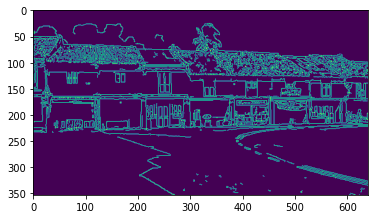

In [63]:
canny_edges = cv.Canny(gray_house, 100, 200)
plt.imshow(canny_edges)

#### Line Detection

Line detection is an algorithm in image processing to detect lines present in an image. This takes a collection of edges present in an image as input and detects all the lines on which these edge points lie. In literature, many line detection algorithms can be found. Among them, the convolution based techniques and Hough Line transformation are more popular. 

https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

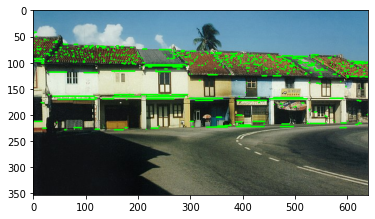

In [66]:
lines = cv.HoughLinesP(canny_edges,1,np.pi/180,150,0,0)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
      cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(img)